# Task - 2: Predicting the optimum number of clusters and represent it visually

###  Anilchoudary Rugaramji



### GRIP@ The Sparks Foundation

### The main objective of the task is to  predict the optimum number of clusters in ‘Iris’ dataset and represent it visually 
                                                                                                              


### Importing  the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Load the Iris dataset

Loading of Iris data set from a CSV file using Pandas and also visualizing the first five rows to quickly test if 
the object has the right type of data in it.

In [3]:
iris_data = pd.read_csv (r"C:\Users\Anilchoudary R\task 2\Iris.csv")
iris_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Dropping the ID Column

The "ID" column has no significance in the current case study so it is being omitted using the drop function.

In [4]:
iris_data.drop("Id", axis=1, inplace= True)

Revisualizing the data frame to cross check if the "ID" column has been dropped.

In [5]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Shape of an array is the number of elements in each dimension and it is obtained using following line of code. The data has 150 rows and 5 dimensions.


In [6]:
iris_data.shape

(150, 5)

Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory
analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


To check the data type of each column  dataframe.dtypes() is being used. 

In [8]:
iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

The below line of code shows the discriptive statistics of the data like mean, standard deviation etc. 

In [9]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Inspecting the dataset

In [10]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(iris_data)

,Data Type,No of Levels,Levels
SepalLengthCm,float64,35,[5.1 4.9 4.7 4.6 5.0 5.4 4.4 4.8 4.3 5.8 5.7 5...
SepalWidthCm,float64,23,[3.5 3.0 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.0 4.4 3...
PetalLengthCm,float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.0 1.9 4.7 4.5 4...
PetalWidthCm,float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.0 1...
Species,object,3,['Iris-setosa' 'Iris-versicolor' 'Iris-virgini...


### Checking missing values

Dataframe.isnull() function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays,
None or NaN in object arrays, NaT in datetimelike).

In [11]:
iris_data.isnull().sum(axis=0)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Frequency of each Species in the dataset

In [12]:
iris_data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

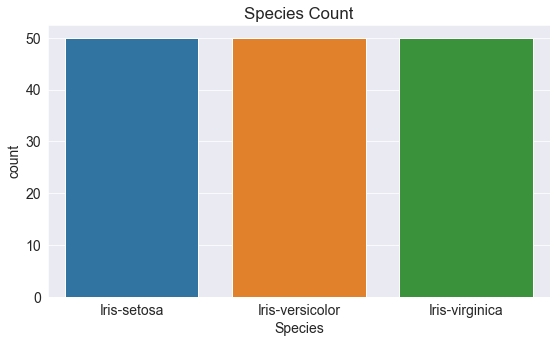

In [13]:
plt.title('Species Count')
sns.countplot(iris_data['Species']);

#### Pair plot Visulaization

One of the most effective way of EDA is pairplots. It is a quick way to understand the distribution and its relaionships well. 
Seaborn provides a simple default method for making pair plots that can be customized and extended through the Pair Grid class.

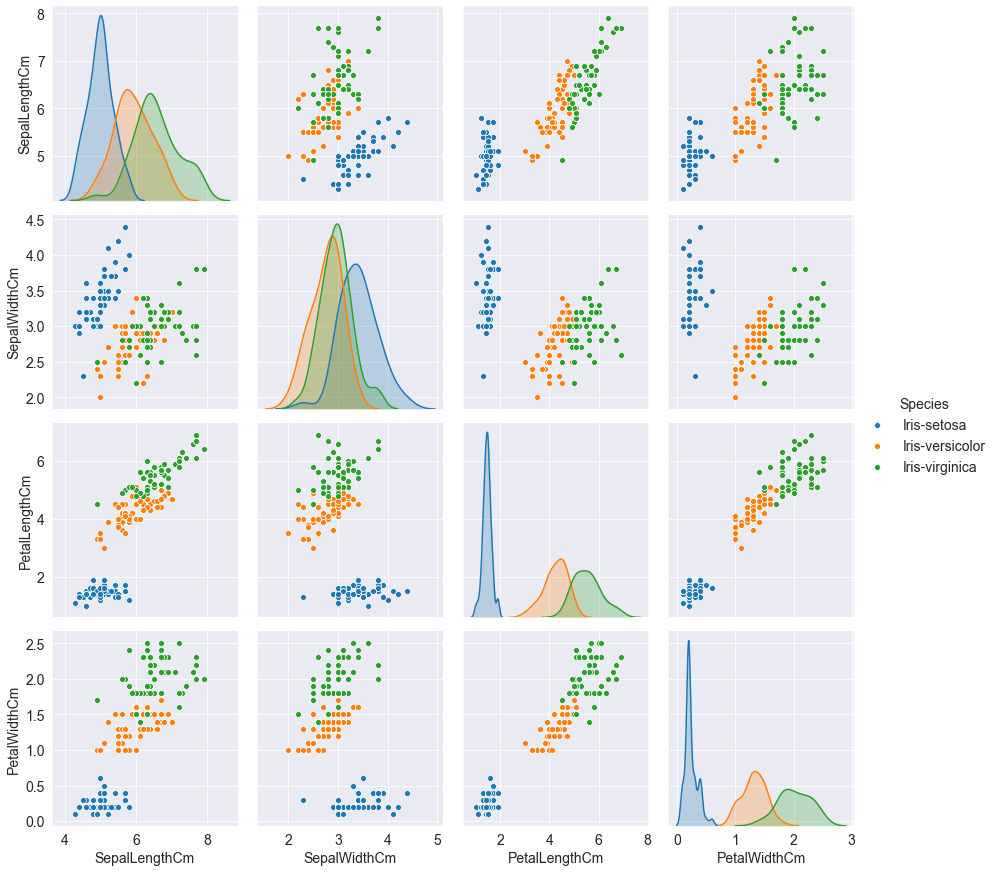

In [14]:
sns.pairplot(iris_data,hue="Species",height=3);

### To find the optimum value of k.

"K" is an important hyperparameter in k-means clustering. The value of k is the number of clusters the algorithm will divide the whole data.
It can be found also by domain knowledge. But when there is no domain knowledge about the data. It also found using the "Elbow Method"
or"knee method". Below lines of code gives the right value of k for our Iris data set. 

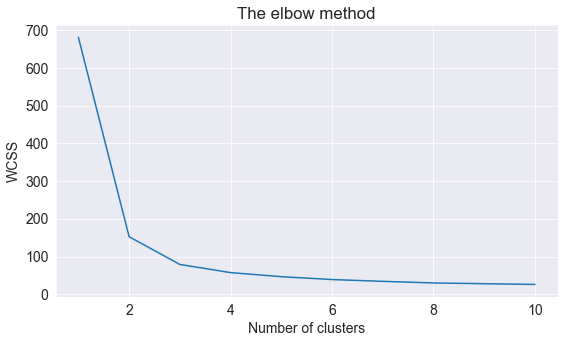

In [15]:
x = iris_data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The above graph clearly demonstrates, why it is called the "Elbow Method". We decide the value of k where this elbow occurs. This is when the within-cluster sum of squares doesn't decrease significantly with every iteration.
Based on this observation, we choose the value of k as "3". 

#### Application of K means on our dataset.


In [16]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

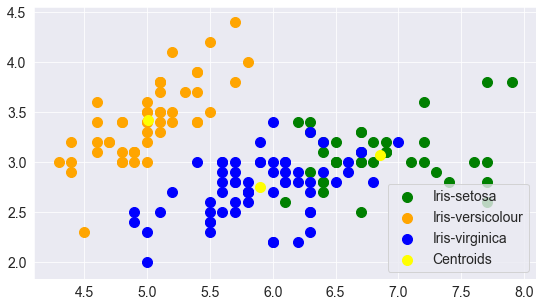

In [17]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()